Current working directory: /Users/ulrikberge/Desktop/kystskolen-google-ads/notebooks

Files in data directory:
- DemographicsGender_Age_impressions-percentage.csv
- Day_&_hour_Hour.csv
- SearchesQueries.csv
- Time_series.csv
- Search_keywords.csv
- Day_&_hourDay_Hour.csv
- Devices.csv
- Day_&_hourDay.csv
- Searches.csv
- Campaigns.csv

=== CAMPAIGN ANALYSIS ===
Loading campaign file: Campaigns.csv
Columns: ['Campaign Name', 'Campaign Group Name', 'Campaign Status', 'Cost', 'Clicks', 'CTR']
Cleaning Cost column: Cost
Cleaning Clicks column: Clicks
Cleaning CTR column: CTR

Cleaned campaign data (first 3 rows):
               Campaign Name  Campaign Group Name Campaign Status       Cost  \
0          Oslo-konvertering                  NaN          Paused  267799.89   
1  Kristiansand-konvertering                  NaN          Paused  112937.12   
2        Bergen-konvertering                  NaN          Paused   71788.54   

   Clicks    CTR        CPC  
0  6519.0   7.03  41.079903  
1 

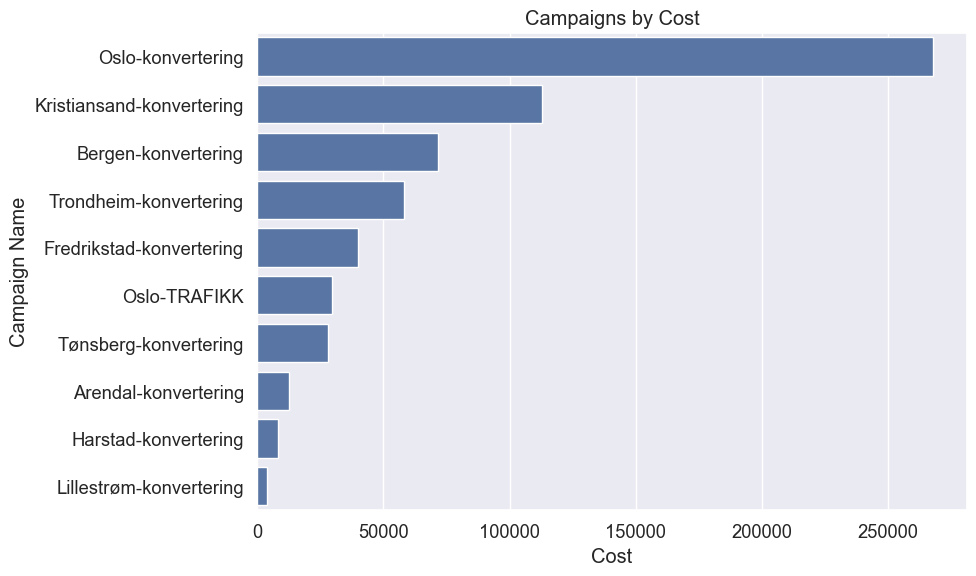


=== DEVICE ANALYSIS ===
Loading device file: Devices.csv
Columns: ['Device', 'Cost', 'Impressions', 'Clicks']
Cleaning column: Cost
Cleaning column: Impressions
Cleaning column: Clicks

Cleaned device data:
          Device       Cost  Impressions   Clicks        CPC       CTR
0      Computers  105443.33      92825.0   2355.0  44.774238  2.537032
1  Mobile phones  523944.11     198970.0  13695.0  38.258058  6.882947
2        Tablets    3782.12      11408.0    207.0  18.271111  1.814516
3     TV screens       0.00          1.0      0.0        NaN  0.000000


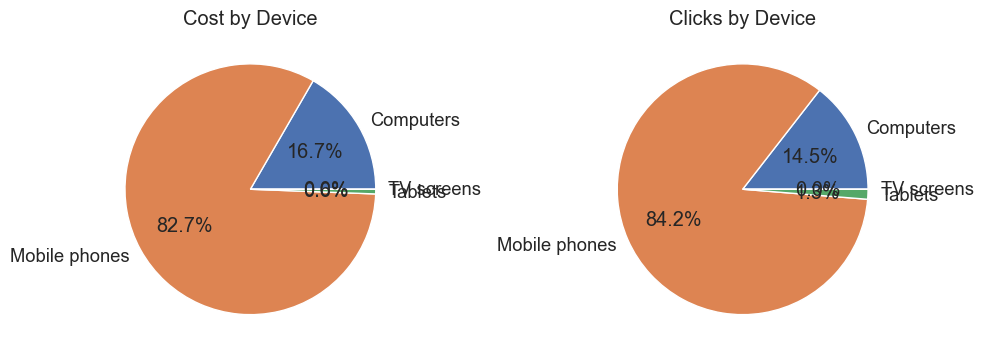


=== DAY OF WEEK ANALYSIS ===
No day file found

=== SEARCH TERM ANALYSIS ===
Loading search file: Searches.csv
Columns: ['Search', 'Cost', 'Clicks', 'Impressions', 'Conversions']
Cleaning column: Cost
Cleaning column: Clicks
Cleaning column: Impressions
Cleaning column: Conversions

Top 5 searches by cost:
                         Search       Cost  Clicks  Impressions  Conversions  \
0                båtførerprøven  257862.81  5369.0      30765.0          0.0   
2                     båtlappen   25061.45   815.0       3099.0          0.0   
15  båtførerprøven kristiansand   16581.52   250.0        617.0          0.0   
11          båtførerprøven oslo   15390.30   252.0        753.0          0.0   
17        båtførerprøven bergen   12479.69   184.0        570.0          0.0   

          CTR        CPC  
0   17.451650  48.028089  
2   26.298806  30.750245  
15  40.518639  66.326080  
11  33.466135  61.072619  
17  32.280702  67.824402  


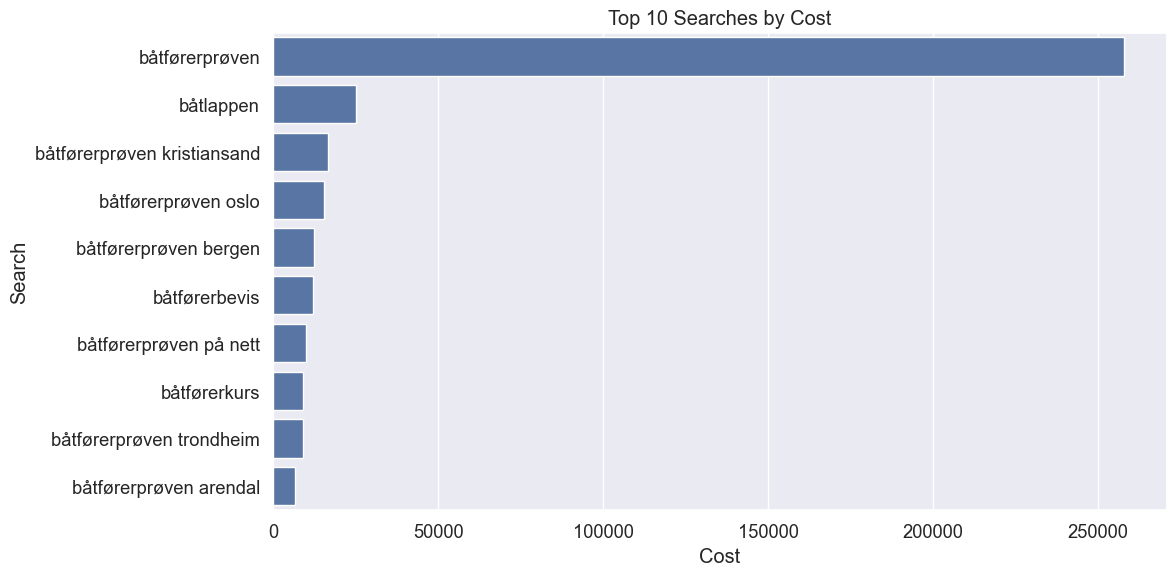


Analysis complete! Review the outputs above for insights into your Google Ads performance.


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

# First, let's check the data directory and files
print("Current working directory:", os.getcwd())
print("\nFiles in data directory:")
data_files = os.listdir("data")
for file in data_files:
    print(f"- {file}")

# Improved function to handle various data formats
def clean_numeric(value):
    """
    Clean and convert string values to numeric.
    Handles currency (NOK), percentages (%), and commas.
    """
    if isinstance(value, (int, float)):
        return value
    
    if isinstance(value, str):
        # Handle percentage values
        if '%' in value:
            try:
                return float(value.replace('%', ''))
            except ValueError:
                return np.nan
        
        # Handle currency values
        try:
            # Remove NOK, commas and other non-numeric characters except decimal points
            cleaned = re.sub(r'[^0-9\.\-]', '', value)
            return float(cleaned)
        except ValueError:
            return np.nan
    
    return np.nan

# Step 1: Load and clean campaign data
# ------------------------------------
print("\n=== CAMPAIGN ANALYSIS ===")
try:
    # Try to find the campaigns file with case-insensitive search
    campaign_file = None
    for file in data_files:
        if 'campaign' in file.lower():
            campaign_file = file
            break
    
    if campaign_file:
        print(f"Loading campaign file: {campaign_file}")
        campaigns = pd.read_csv(f"data/{campaign_file}")
        
        # Print column names
        print("Columns:", campaigns.columns.tolist())
        
        # Clean numeric columns one by one
        # For Cost
        cost_col = [col for col in campaigns.columns if 'cost' in col.lower()]
        if cost_col:
            cost_col = cost_col[0]
            print(f"Cleaning Cost column: {cost_col}")
            campaigns[cost_col] = campaigns[cost_col].apply(clean_numeric)
        
        # For Clicks
        clicks_col = [col for col in campaigns.columns if 'click' in col.lower()]
        if clicks_col:
            clicks_col = clicks_col[0]
            print(f"Cleaning Clicks column: {clicks_col}")
            campaigns[clicks_col] = campaigns[clicks_col].apply(clean_numeric)
        
        # For CTR
        ctr_col = [col for col in campaigns.columns if 'ctr' in col.lower()]
        if ctr_col:
            ctr_col = ctr_col[0]
            print(f"Cleaning CTR column: {ctr_col}")
            campaigns[ctr_col] = campaigns[ctr_col].apply(clean_numeric)
        
        # Calculate CPC
        if cost_col and clicks_col:
            campaigns['CPC'] = campaigns[cost_col] / campaigns[clicks_col]
        
        # Display cleaned data
        print("\nCleaned campaign data (first 3 rows):")
        print(campaigns.head(3))
        
        # Simple visualization if possible
        if cost_col:
            try:
                # Sort for better visualization
                campaign_name_col = campaigns.columns[0]  # Assuming first column is campaign name
                campaigns_sorted = campaigns.sort_values(cost_col, ascending=False)
                
                plt.figure(figsize=(10, 6))
                sns.barplot(x=cost_col, y=campaign_name_col, data=campaigns_sorted)
                plt.title('Campaigns by Cost')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"Error creating campaign visualization: {e}")
    else:
        print("No campaign file found")
except Exception as e:
    print(f"Error processing campaign data: {e}")

# Step 2: Device Analysis
# ------------------------------------
print("\n=== DEVICE ANALYSIS ===")
try:
    # Find device file
    device_file = None
    for file in data_files:
        if 'device' in file.lower():
            device_file = file
            break
    
    if device_file:
        print(f"Loading device file: {device_file}")
        devices = pd.read_csv(f"data/{device_file}")
        
        # Print column names
        print("Columns:", devices.columns.tolist())
        
        # Clean columns
        for col in devices.columns:
            if any(metric in col.lower() for metric in ['cost', 'click', 'impression']):
                print(f"Cleaning column: {col}")
                devices[col] = devices[col].apply(clean_numeric)
        
        # Calculate metrics if possible
        if 'Cost' in devices.columns and 'Clicks' in devices.columns:
            devices['CPC'] = devices['Cost'] / devices['Clicks']
        
        if 'Clicks' in devices.columns and 'Impressions' in devices.columns:
            devices['CTR'] = devices['Clicks'] / devices['Impressions'] * 100
        
        # Display cleaned data
        print("\nCleaned device data:")
        print(devices)
        
        # Visualization
        try:
            plt.figure(figsize=(10, 5))
            if 'Cost' in devices.columns:
                plt.subplot(1, 2, 1)
                plt.pie(devices['Cost'], labels=devices['Device'], autopct='%1.1f%%')
                plt.title('Cost by Device')
            
            if 'Clicks' in devices.columns:
                plt.subplot(1, 2, 2)
                plt.pie(devices['Clicks'], labels=devices['Device'], autopct='%1.1f%%')
                plt.title('Clicks by Device')
            
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error creating device visualization: {e}")
    else:
        print("No device file found")
except Exception as e:
    print(f"Error processing device data: {e}")

# Step 3: Day of Week Analysis
# ------------------------------------
print("\n=== DAY OF WEEK ANALYSIS ===")
try:
    # Find day data file
    day_file = None
    for file in data_files:
        if 'day' in file.lower() and 'hour' not in file.lower():
            day_file = file
            break
    
    if day_file:
        print(f"Loading day file: {day_file}")
        day_data = pd.read_csv(f"data/{day_file}")
        
        # Print column names
        print("Columns:", day_data.columns.tolist())
        
        # Clean impressions column
        if 'Impressions' in day_data.columns:
            day_data['Impressions'] = day_data['Impressions'].apply(clean_numeric)
        
        # Display cleaned data
        print("\nCleaned day data:")
        print(day_data)
        
        # Visualization
        try:
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Day', y='Impressions', data=day_data)
            plt.title('Impressions by Day of Week')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error creating day visualization: {e}")
    else:
        print("No day file found")
except Exception as e:
    print(f"Error processing day data: {e}")

# Step 4: Search Term Analysis
# ------------------------------------
print("\n=== SEARCH TERM ANALYSIS ===")
try:
    # Find search data file
    search_file = None
    for file in data_files:
        if 'search' in file.lower() and 'queries' not in file.lower() and 'keyword' not in file.lower():
            search_file = file
            break
    
    if search_file:
        print(f"Loading search file: {search_file}")
        searches = pd.read_csv(f"data/{search_file}")
        
        # Print column names
        print("Columns:", searches.columns.tolist())
        
        # Clean numeric columns
        for col in searches.columns:
            if any(metric in col.lower() for metric in ['cost', 'click', 'impression', 'conversion']):
                print(f"Cleaning column: {col}")
                searches[col] = searches[col].apply(clean_numeric)
        
        # Calculate CTR and CPC if possible
        if 'Clicks' in searches.columns and 'Impressions' in searches.columns:
            searches['CTR'] = searches['Clicks'] / searches['Impressions'] * 100
        
        if 'Cost' in searches.columns and 'Clicks' in searches.columns:
            searches['CPC'] = searches['Cost'] / searches['Clicks']
        
        # Display top searches
        print("\nTop 5 searches by cost:")
        print(searches.sort_values('Cost', ascending=False).head(5))
        
        # Visualization
        try:
            top_searches = searches.sort_values('Cost', ascending=False).head(10)
            plt.figure(figsize=(12, 6))
            sns.barplot(x='Cost', y='Search', data=top_searches)
            plt.title('Top 10 Searches by Cost')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error creating search visualization: {e}")
    else:
        print("No search file found")
except Exception as e:
    print(f"Error processing search data: {e}")

print("\nAnalysis complete! Review the outputs above for insights into your Google Ads performance.")

Loading data files...
Loaded Campaigns data: (10, 6)
Loaded Search Keywords data: (50, 8)
Loaded Searches data: (300, 5)
Loaded Devices data: (4, 4)
Loaded Hour data: (24, 2)
Loaded Day-Hour data: (168, 3)
Loaded Day data: (7, 2)
Loaded Time Series data: (42, 7)


=== SEARCH KEYWORD ANALYSIS ===

Keyword Performance by Match Type:
                 Cost   Clicks   CTR  Keyword_Count   CPC
Match type                                               
Broad match 607366.15 14471.00 18.21             46 41.97
Exact match   6586.43   161.00 43.92              4 40.91


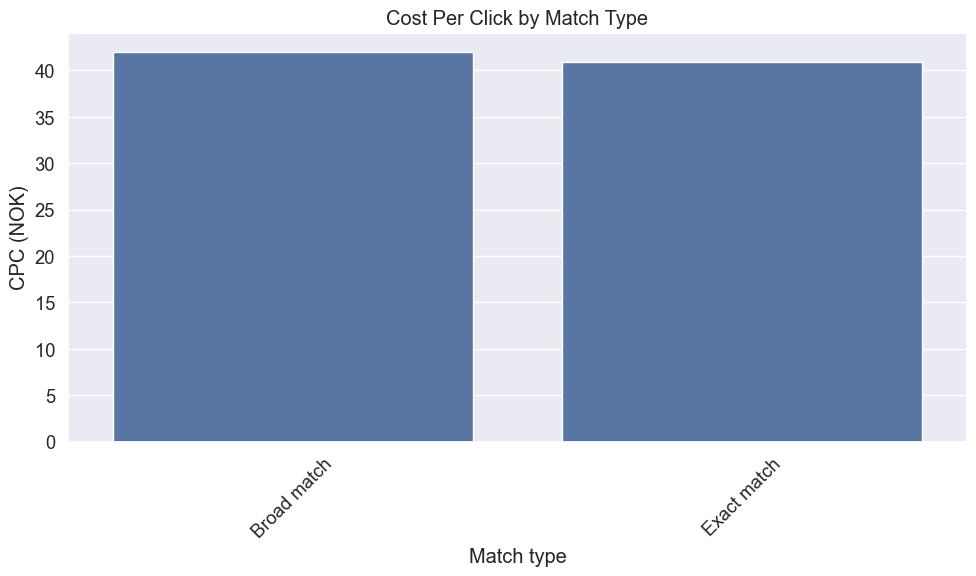


Top 10 Keywords by Cost:
   Search Keyword   Match type      Cost  Clicks   CTR   CPC
0  båtførerprøven  Broad match 126354.53 2548.00 14.88 49.59
1   båtførerbevis  Broad match  93281.91 2406.00  9.66 38.77
2   båtførerbevis  Broad match  61292.34 1282.00 12.64 47.81
3  båtførerprøven  Broad match  39939.31  762.00 16.56 52.41
4   båtførerbevis  Broad match  34022.72  796.00 11.82 42.74
5  båtførerprøven  Broad match  27763.39  654.00 25.32 42.45
6   båtførerbevis  Broad match  24541.08  640.00 14.09 38.35
7  båtførerprøven  Broad match  24515.61  496.00 14.45 49.43
8  båtførerprøven  Broad match  18106.93  305.00 15.77 59.37
9   båtførerbevis  Broad match  17731.97  368.00  9.53 48.18


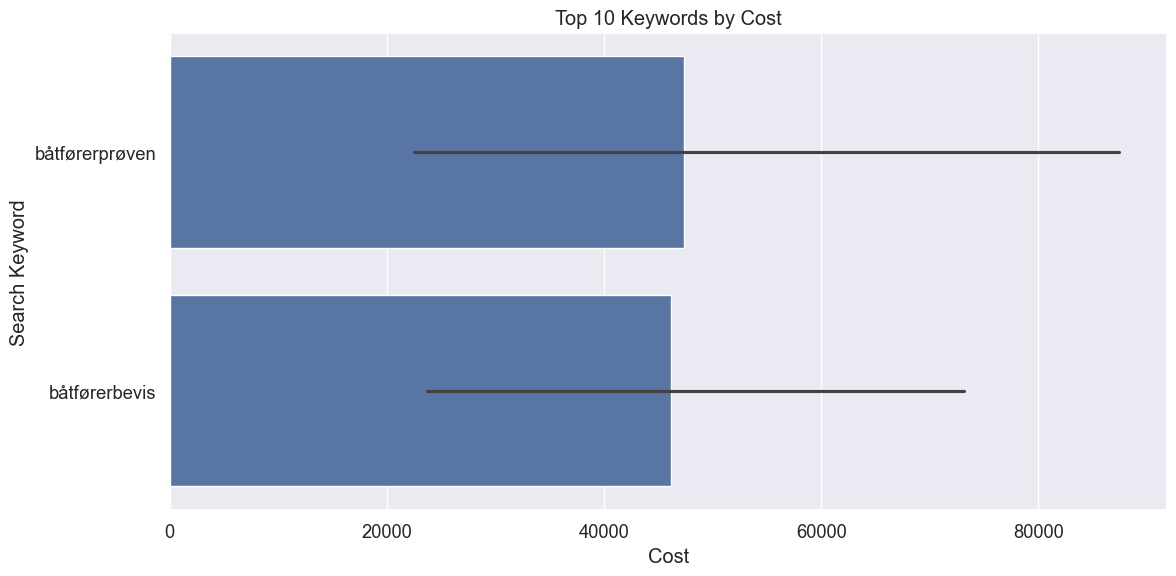


High-CTR Keywords (>20% with at least 50 clicks):
              Search Keyword   Match type   CTR  Clicks     Cost   CPC
28  båtførerprøven trondheim  Exact match 37.41   55.00  2044.45 37.17
14       båtførerprøven oslo  Broad match 34.39  152.00 11076.27 72.87
22                 båtlappen  Broad match 32.21  105.00  3471.39 33.06
25     båtførerprøven bergen  Exact match 30.54   51.00  2547.64 49.95
24                 båtlappen  Broad match 27.97   99.00  2576.35 26.02
5             båtførerprøven  Broad match 25.32  654.00 27763.39 42.45
11                 båtlappen  Broad match 25.17  436.00 14108.90 32.36
30                 båtlappen  Broad match 21.35   98.00  1756.47 17.92

Expensive Keywords (CPC >50 NOK with at least 50 clicks):
               Search Keyword   Match type   CPC     Cost  Clicks   CTR
14        båtførerprøven oslo  Broad match 72.87 11076.27  152.00 34.39
19  båtførerkurs kristiansand  Broad match 67.28  4103.79   61.00 10.46
8              båtførerprøven  Broa

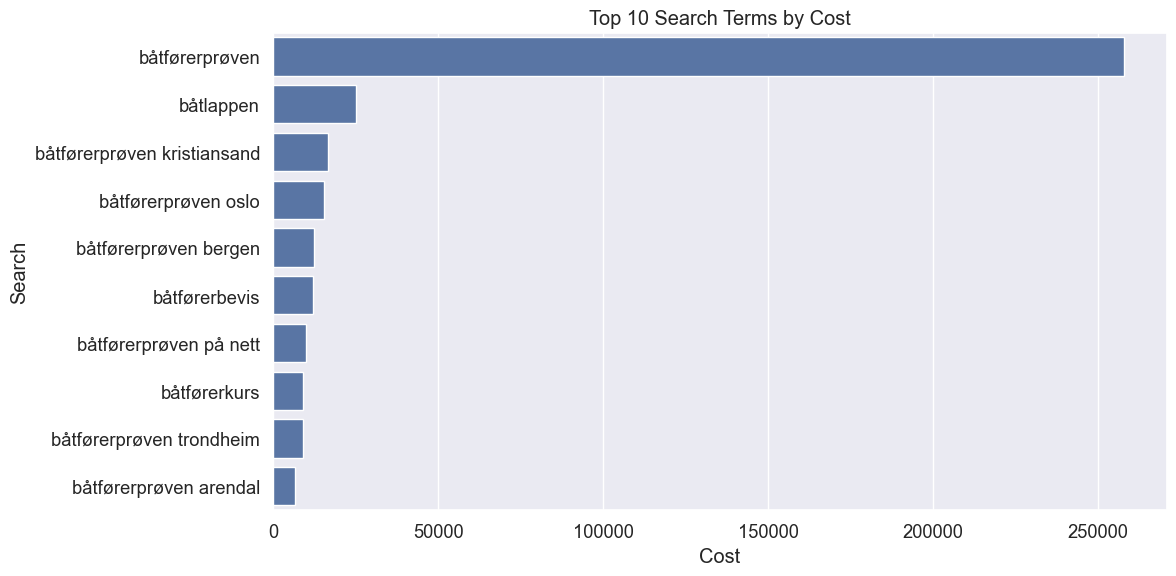


High-CTR Search Terms (>30% with at least 50 clicks):
                         Search   CTR  Clicks     Cost   CPC
88          båtførerkurs bergen 48.08   50.00  2978.49 59.57
78    båtførerkurs kristiansand 45.83   55.00  3760.80 68.38
15  båtførerprøven kristiansand 40.52  250.00 16581.52 66.33
16     båtførerprøven trondheim 35.30  203.00  9073.09 44.70
11          båtførerprøven oslo 33.47  252.00 15390.30 61.07
17        båtførerprøven bergen 32.28  184.00 12479.69 67.82

Branded vs. Non-Branded Search Performance:
                Cost   Clicks  Impressions  Search_Count   CTR   CPC  \
Is_Branded                                                             
False       61884.75  1767.00     15636.00            99 11.30 35.02   
True       449469.51 10155.00     65633.00           201 15.47 44.26   

            Cost_Share  Click_Share  
Is_Branded                           
False            12.10        14.82  
True             87.90        85.18  


<Figure size 1000x600 with 0 Axes>

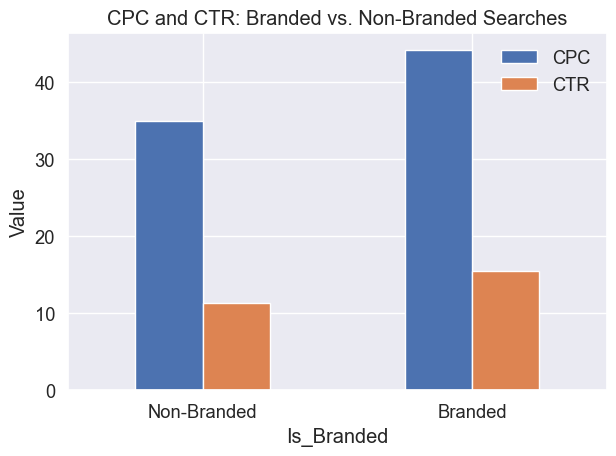


Location-Specific vs. Generic Search Performance:
                  Cost   Clicks  Impressions  Search_Count   CTR   CPC
Has_Location                                                          
False        433474.72 10580.00     77035.00           274 13.73 40.97
True          77879.54  1342.00      4234.00            26 31.70 58.03

Performance by Specific Location:
                 Cost  Clicks  Impressions   CTR   CPC
Location                                              
kristiansand 23150.40  349.00       904.00 38.61 66.33
oslo         20478.90  361.00      1342.00 26.90 56.73
bergen       18225.88  280.00       835.00 33.53 65.09
trondheim    10667.17  246.00       732.00 33.61 43.36
fredrikstad   4375.46   79.00       301.00 26.25 55.39
stavanger      981.73   27.00       120.00 22.50 36.36


=== TIME-BASED ANALYSIS ===

Impressions by Hour of Day:
            Impressions
Start Hour             
1 AM            2841.00
2 AM            1586.00
3 AM             940.00
4 AM       

/var/folders/dl/5jc0b2v55v71m5ygcbqgc6l40000gn/T/ipykernel_37107/1931488152.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_searches['Location'] = location_searches['Search'].apply(extract_location)


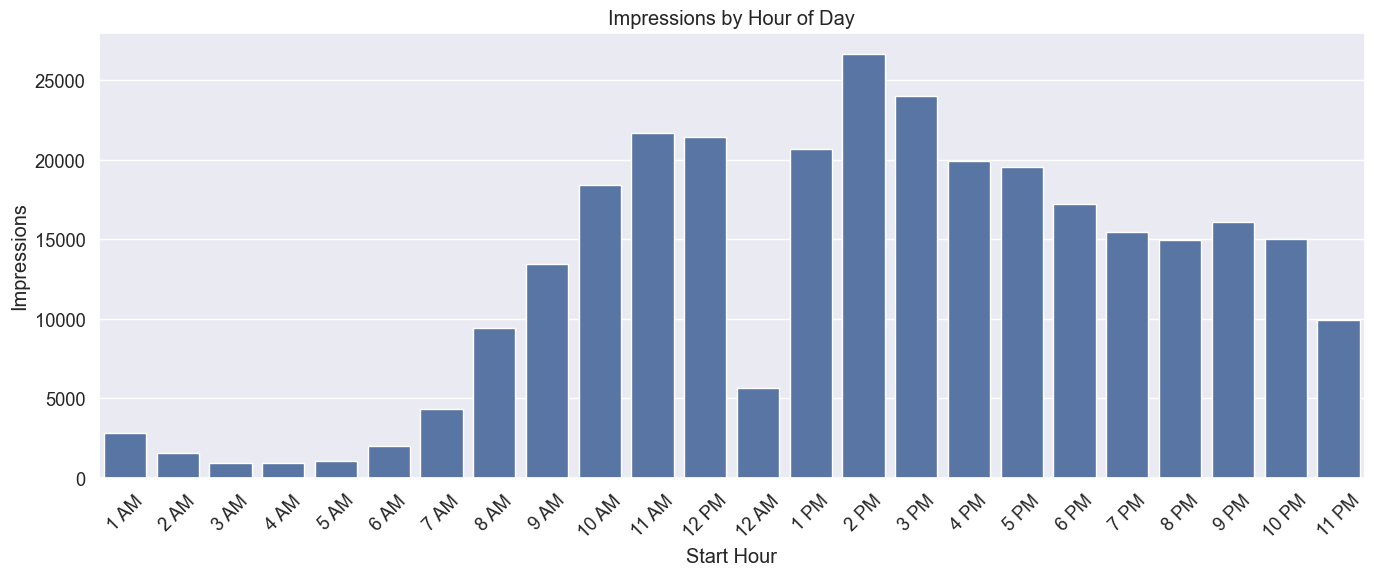


Hourly Bidding Recommendations:
Premium Hours (+15-20% bid adjustment): 11 AM, 12 PM, 1 PM, 2 PM, 3 PM, 4 PM
High Hours (+5-10% bid adjustment): 10 AM, 5 PM, 6 PM, 7 PM, 9 PM, 10 PM
Regular Hours (No adjustment): 7 AM, 8 AM, 9 AM, 12 AM, 8 PM, 11 PM
Low Hours (-20-30% bid adjustment): 1 AM, 2 AM, 3 AM, 4 AM, 5 AM, 6 AM

Impressions by Day of Week:
           Impressions
Day                   
Sunday        37994.00
Monday        44023.00
Tuesday       49552.00
Wednesday     71866.00
Thursday      36301.00
Friday        32614.00
Saturday      30854.00


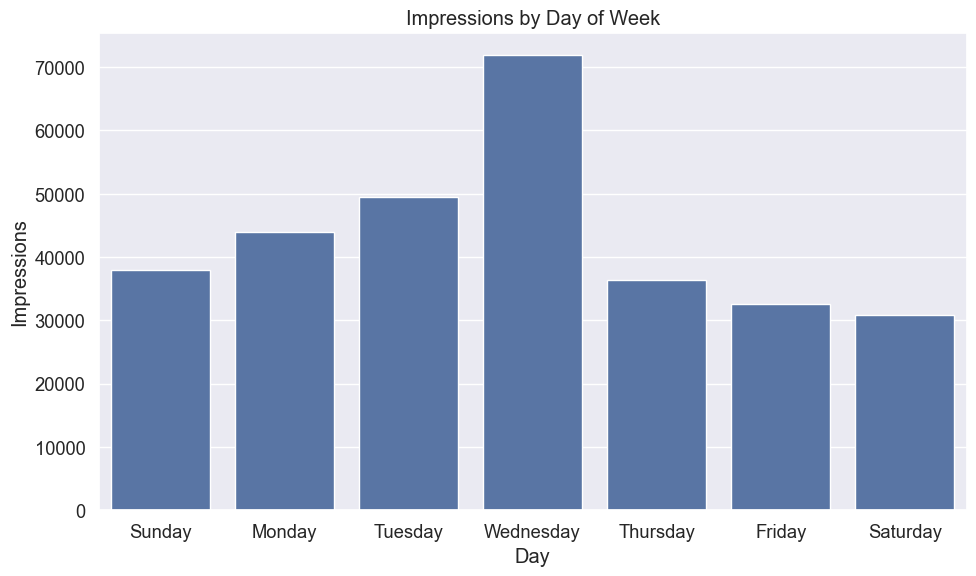


Day of Week Bidding Recommendations:
         Day  Impressions       Recommendation
3  Wednesday     71866.00  +15% bid adjustment
2    Tuesday     49552.00   +5% bid adjustment
1     Monday     44023.00        No adjustment
0     Sunday     37994.00  -10% bid adjustment
4   Thursday     36301.00  -10% bid adjustment
5     Friday     32614.00  -10% bid adjustment
6   Saturday     30854.00  -10% bid adjustment

Total Impressions by Day:
Day
Wednesday   71866.00
Tuesday     49552.00
Monday      44023.00
Sunday      37994.00
Thursday    36301.00
Friday      32614.00
Saturday    30854.00
dtype: float64


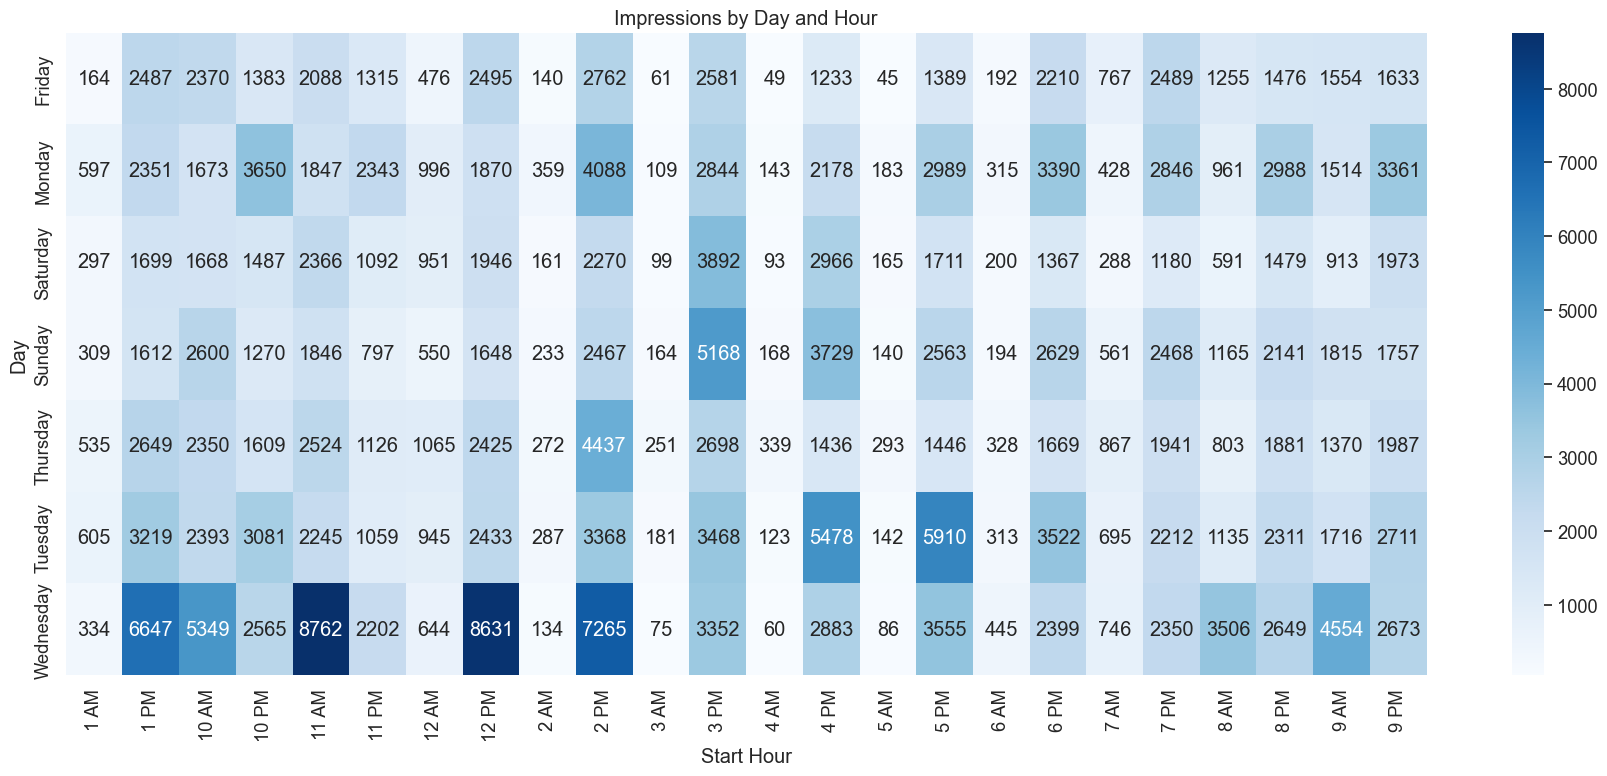


Top 5 Day-Hour Combinations:
           Day   Hour  Impressions
148  Wednesday  11 AM      8762.00
151  Wednesday  12 PM      8631.00
153  Wednesday   2 PM      7265.00
145  Wednesday   1 PM      6647.00
135    Tuesday   5 PM      5910.00

Bottom 5 Day-Hour Combinations:
           Day  Hour  Impressions
14      Friday  5 AM        45.00
12      Friday  4 AM        49.00
156  Wednesday  4 AM        60.00
10      Friday  3 AM        61.00
154  Wednesday  3 AM        75.00


=== CAMPAIGN PERFORMANCE ANALYSIS ===

Campaign Performance Overview:
               Campaign Name Campaign Status      Cost  Clicks   CTR   CPC  \
0          Oslo-konvertering          Paused 267799.89 6519.00  7.03 41.08   
1  Kristiansand-konvertering          Paused 112937.12 2310.00 14.16 48.89   
2        Bergen-konvertering          Paused  71788.54 2074.00  1.83 34.61   
3     Trondheim-konvertering          Paused  58223.59 1489.00 13.46 39.10   
4   Fredrikstad-konvertering          Paused  40106.51  858.0

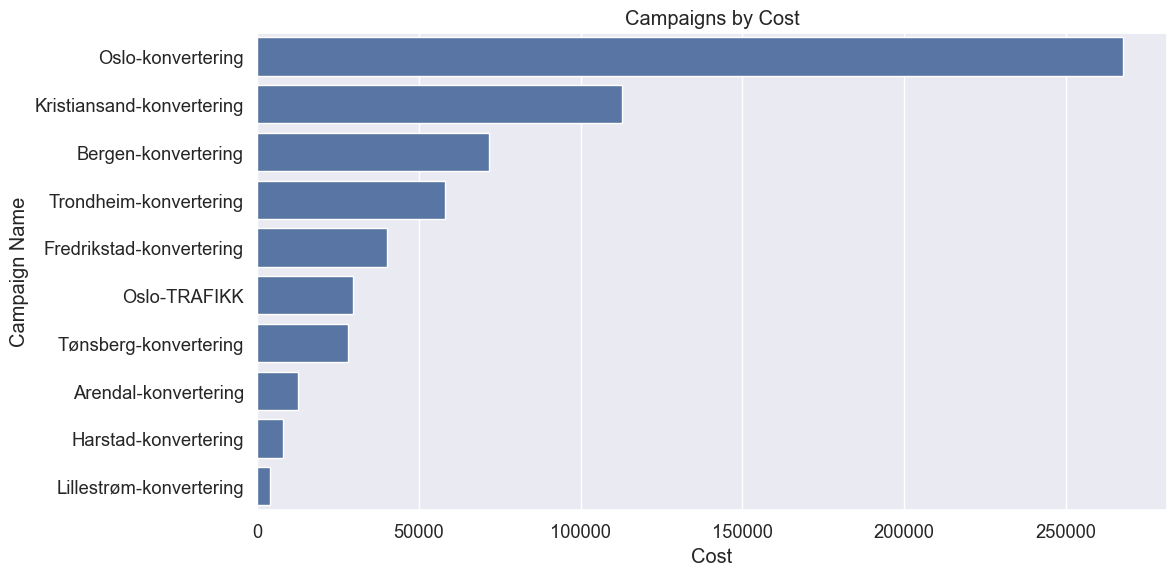

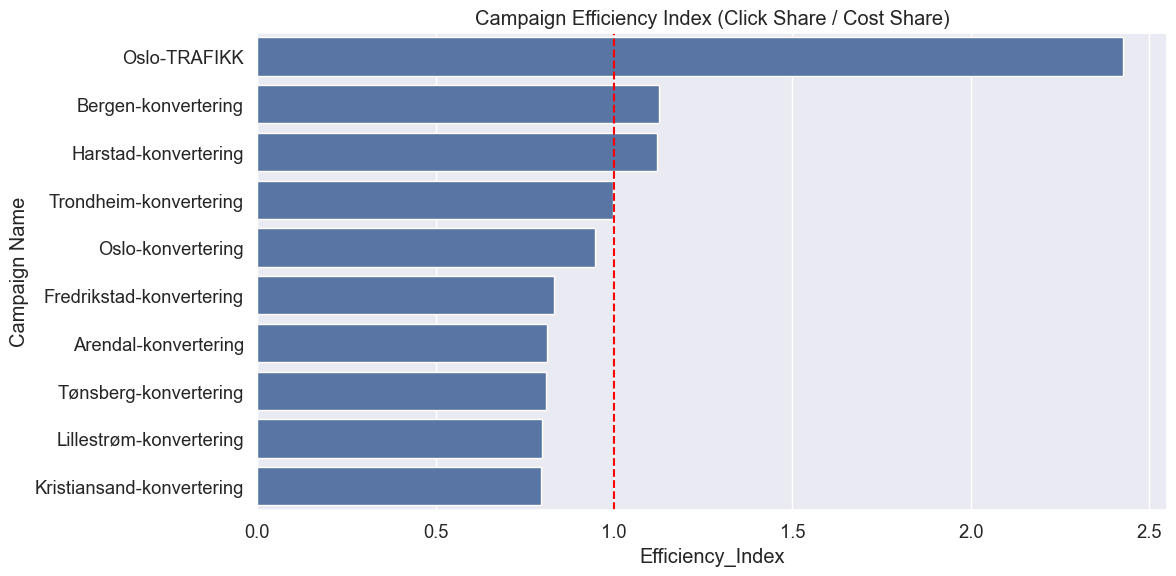


High Efficiency Campaigns (recommended for more budget):
          Campaign Name     Cost  Clicks  CTR   CPC  Efficiency_Index
5          Oslo-TRAFIKK 29660.63 1849.00 6.37 16.04              2.43
2   Bergen-konvertering 71788.54 2074.00 1.83 34.61              1.13
8  Harstad-konvertering  8139.08  234.00 8.40 34.78              1.12

Low Efficiency Campaigns (need optimization or reduced budget):
               Campaign Name      Cost  Clicks   CTR   CPC  Efficiency_Index
1  Kristiansand-konvertering 112937.12 2310.00 14.16 48.89              0.80
9    Lillestrøm-konvertering   3950.91   81.00  9.56 48.78              0.80
6      Tønsberg-konvertering  28029.90  582.00  9.78 48.16              0.81
7       Arendal-konvertering  12533.39  261.00 13.18 48.02              0.81
4   Fredrikstad-konvertering  40106.51  858.00  2.96 46.74              0.83
0          Oslo-konvertering 267799.89 6519.00  7.03 41.08              0.95
3     Trondheim-konvertering  58223.59 1489.00 13.46 39.10

/var/folders/dl/5jc0b2v55v71m5ygcbqgc6l40000gn/T/ipykernel_37107/1931488152.py:560: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_searches['Category'] = significant_searches['Search'].apply(categorize_search)
/var/folders/dl/5jc0b2v55v71m5ygcbqgc6l40000gn/T/ipykernel_37107/1931488152.py:693: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_searches['CTR_Score'] = relevant_searches['CTR'] / relevant_searches['CTR'].max()
/var/folders/dl/5jc0b2v55v71m5ygcbqgc6l40000gn/T/ipykernel_37107/19314

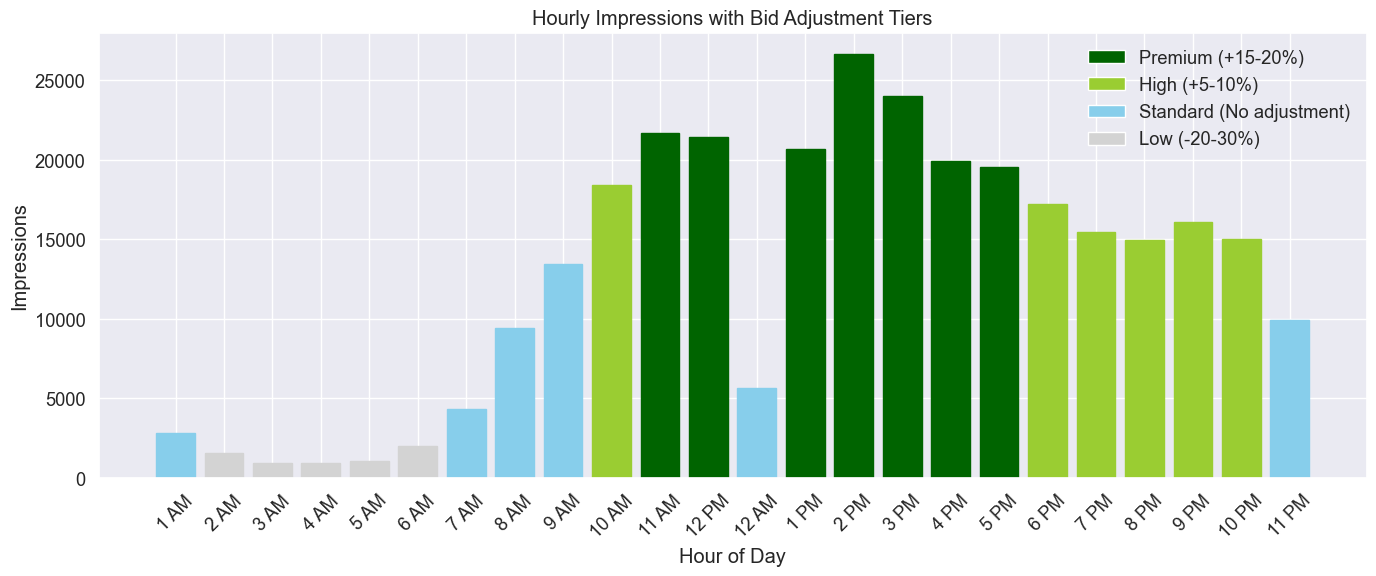


4. Combined Day-Hour Optimization Strategy:
Could not create day-hour pivot table: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


=== IMPLEMENTATION ROADMAP ===

1. Week 1: Audit & Cleanup
   • Remove underperforming keywords (CTR <1.5% and CPC >NOK 50)
   • Restructure campaigns according to geographic performance
   • Set up conversion tracking (critical due to zero conversions in current data)

2. Week 2: Staged Reactivation
   • Reactivate highest-performing city campaign first
   • Implement new bidding strategy and dayparting
   • Set daily budget caps at 50% of historical average

3. Week 3: Optimization 
   • Analyze first-week performance data
   • Reactivate additional city campaigns with optimized structure
   • Adjust bids based on initial performance

4. Week 4: Scaling
   • Increase budget for high-performing campaigns
   • Expand keyword coverage in successful areas
   • Implement A/B testing for ad creatives



=== EXPE

In [11]:
# Advanced Google Ads Analysis for Budget Optimization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from datetime import datetime

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Define helper function to clean currency and percentage values
def clean_numeric(value):
    """
    Clean and convert string values to numeric.
    Handles currency (NOK), percentages (%), and commas.
    """
    if isinstance(value, (int, float)):
        return value
    
    if isinstance(value, str):
        # Handle percentage values
        if '%' in value:
            try:
                return float(value.replace('%', ''))
            except ValueError:
                return np.nan
        
        # Handle currency values
        try:
            # Remove NOK, commas and other non-numeric characters except decimal points
            cleaned = re.sub(r'[^0-9\.\-]', '', value)
            return float(cleaned)
        except ValueError:
            return np.nan
    
    return np.nan

# --------------------------------
# 1. Load and Clean Data
# --------------------------------

# Function to load and clean a CSV file
def load_and_clean_csv(file_path, numeric_cols=None):
    """Load a CSV file and clean specific numeric columns."""
    try:
        df = pd.read_csv(file_path)
        
        # Clean column names (strip whitespace)
        df.columns = [col.strip() for col in df.columns]
        
        # If numeric_cols not specified, try to detect them
        if numeric_cols is None:
            numeric_cols = [col for col in df.columns if any(
                metric in col.lower() for metric in 
                ['cost', 'click', 'impression', 'ctr', 'conversion', 'cpc', 'conv']
            )]
        
        # Clean numeric columns
        for col in numeric_cols:
            if col in df.columns:
                df[col] = df[col].apply(clean_numeric)
                
        return df
    
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Load all data files
print("Loading data files...")

# Load campaign data
campaigns_df = load_and_clean_csv('data/Campaigns.csv')
print(f"Loaded Campaigns data: {campaigns_df.shape}")

# Load search keywords data
search_keywords_df = load_and_clean_csv('data/Search_keywords.csv')
print(f"Loaded Search Keywords data: {search_keywords_df.shape}")

# Load searches data
searches_df = load_and_clean_csv('data/Searches.csv')
print(f"Loaded Searches data: {searches_df.shape}")

# Load device data
devices_df = load_and_clean_csv('data/Devices.csv')
print(f"Loaded Devices data: {devices_df.shape}")

# Load hour data
hour_df = load_and_clean_csv('data/Day_&_hour_Hour.csv')
print(f"Loaded Hour data: {hour_df.shape}")

# Load day-hour data
day_hour_df = load_and_clean_csv('data/Day_&_hourDay_Hour.csv')
print(f"Loaded Day-Hour data: {day_hour_df.shape}")

# Load day data
day_df = load_and_clean_csv('data/Day_&_hourDay.csv')
print(f"Loaded Day data: {day_df.shape}")

# Load time series data
time_series_df = load_and_clean_csv('data/Time_series.csv')
print(f"Loaded Time Series data: {time_series_df.shape}")

# --------------------------------
# 2. Calculate Additional Metrics
# --------------------------------

# For campaigns
if campaigns_df is not None:
    # Calculate CPC
    if 'Cost' in campaigns_df.columns and 'Clicks' in campaigns_df.columns:
        campaigns_df['CPC'] = campaigns_df['Cost'] / campaigns_df['Clicks']
    
    # Calculate efficiency index (normalized CTR to cost ratio)
    if 'CTR' in campaigns_df.columns and 'Cost' in campaigns_df.columns:
        campaigns_df['Cost_Share'] = campaigns_df['Cost'] / campaigns_df['Cost'].sum() * 100
        campaigns_df['Click_Share'] = campaigns_df['Clicks'] / campaigns_df['Clicks'].sum() * 100
        campaigns_df['Efficiency_Index'] = campaigns_df['Click_Share'] / campaigns_df['Cost_Share']

# For search keywords
if search_keywords_df is not None:
    # Calculate CPC
    if 'Cost' in search_keywords_df.columns and 'Clicks' in search_keywords_df.columns:
        search_keywords_df['CPC'] = search_keywords_df['Cost'] / search_keywords_df['Clicks']

# For searches
if searches_df is not None:
    # Calculate CTR and CPC
    if 'Clicks' in searches_df.columns and 'Impressions' in searches_df.columns:
        searches_df['CTR'] = searches_df['Clicks'] / searches_df['Impressions'] * 100
    
    if 'Cost' in searches_df.columns and 'Clicks' in searches_df.columns:
        searches_df['CPC'] = searches_df['Cost'] / searches_df['Clicks']

# For devices
if devices_df is not None:
    # Calculate CTR and CPC
    if 'Clicks' in devices_df.columns and 'Impressions' in devices_df.columns:
        devices_df['CTR'] = devices_df['Clicks'] / devices_df['Impressions'] * 100
    
    if 'Cost' in devices_df.columns and 'Clicks' in devices_df.columns:
        devices_df['CPC'] = devices_df['Cost'] / devices_df['Clicks']

# --------------------------------
# 3. Search Keyword Analysis
# --------------------------------
print("\n\n=== SEARCH KEYWORD ANALYSIS ===")

# 3.1 Analyze keywords by match type
if search_keywords_df is not None and 'Match type' in search_keywords_df.columns:
    match_type_analysis = search_keywords_df.groupby('Match type').agg({
        'Cost': 'sum',
        'Clicks': 'sum',
        'CTR': 'mean',
        'Search Keyword': 'count'
    }).rename(columns={'Search Keyword': 'Keyword_Count'})
    
    # Calculate CPC by match type
    match_type_analysis['CPC'] = match_type_analysis['Cost'] / match_type_analysis['Clicks']
    
    print("\nKeyword Performance by Match Type:")
    print(match_type_analysis)
    
    # Visualize match type performance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=match_type_analysis.index, y=match_type_analysis['CPC'])
    plt.title('Cost Per Click by Match Type')
    plt.ylabel('CPC (NOK)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3.2 Top keywords by cost
if search_keywords_df is not None:
    # Find top keywords
    top_keywords = search_keywords_df.sort_values('Cost', ascending=False).head(10)
    
    print("\nTop 10 Keywords by Cost:")
    print(top_keywords[['Search Keyword', 'Match type', 'Cost', 'Clicks', 'CTR', 'CPC']])
    
    # Visualize top keywords
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Cost', y='Search Keyword', data=top_keywords)
    plt.title('Top 10 Keywords by Cost')
    plt.tight_layout()
    plt.show()

# 3.3 Identify high-performing keywords
if search_keywords_df is not None:
    # Find keywords with high CTR and significant clicks
    high_ctr_keywords = search_keywords_df[
        (search_keywords_df['CTR'] > 20) & 
        (search_keywords_df['Clicks'] >= 50)
    ].sort_values('CTR', ascending=False)
    
    print("\nHigh-CTR Keywords (>20% with at least 50 clicks):")
    if not high_ctr_keywords.empty:
        print(high_ctr_keywords[['Search Keyword', 'Match type', 'CTR', 'Clicks', 'Cost', 'CPC']])
    else:
        print("No keywords meet the criteria")

# 3.4 Identify expensive keywords
if search_keywords_df is not None:
    # Find keywords with high CPC and significant clicks
    expensive_keywords = search_keywords_df[
        (search_keywords_df['CPC'] > 50) & 
        (search_keywords_df['Clicks'] >= 50)
    ].sort_values('CPC', ascending=False)
    
    print("\nExpensive Keywords (CPC >50 NOK with at least 50 clicks):")
    if not expensive_keywords.empty:
        print(expensive_keywords[['Search Keyword', 'Match type', 'CPC', 'Cost', 'Clicks', 'CTR']])
    else:
        print("No keywords meet the criteria")

# --------------------------------
# 4. Search Term Analysis
# --------------------------------
print("\n\n=== SEARCH TERM ANALYSIS ===")

# 4.1 Top search terms by cost
if searches_df is not None:
    top_searches = searches_df.sort_values('Cost', ascending=False).head(10)
    
    print("\nTop 10 Search Terms by Cost:")
    print(top_searches[['Search', 'Cost', 'Clicks', 'Impressions', 'CTR', 'CPC']])
    
    # Visualize top search terms
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Cost', y='Search', data=top_searches)
    plt.title('Top 10 Search Terms by Cost')
    plt.tight_layout()
    plt.show()

# 4.2 Identify high-CTR search terms
if searches_df is not None:
    high_ctr_searches = searches_df[
        (searches_df['CTR'] > 30) & 
        (searches_df['Clicks'] >= 50)
    ].sort_values('CTR', ascending=False)
    
    print("\nHigh-CTR Search Terms (>30% with at least 50 clicks):")
    if not high_ctr_searches.empty:
        print(high_ctr_searches[['Search', 'CTR', 'Clicks', 'Cost', 'CPC']])
    else:
        print("No search terms meet the criteria")

# 4.3 Analyze branded vs. non-branded search terms
if searches_df is not None:
    # Define brand terms
    brand_terms = ['båtførerprøven', 'båtførerbevis', 'båtlappen']
    
    # Categorize searches
    searches_df['Is_Branded'] = searches_df['Search'].apply(
        lambda x: any(term.lower() in x.lower() for term in brand_terms)
    )
    
    # Analyze by brand category
    brand_analysis = searches_df.groupby('Is_Branded').agg({
        'Cost': 'sum',
        'Clicks': 'sum',
        'Impressions': 'sum',
        'Search': 'count'
    }).rename(columns={'Search': 'Search_Count'})
    
    # Calculate metrics
    brand_analysis['CTR'] = brand_analysis['Clicks'] / brand_analysis['Impressions'] * 100
    brand_analysis['CPC'] = brand_analysis['Cost'] / brand_analysis['Clicks']
    brand_analysis['Cost_Share'] = brand_analysis['Cost'] / brand_analysis['Cost'].sum() * 100
    brand_analysis['Click_Share'] = brand_analysis['Clicks'] / brand_analysis['Clicks'].sum() * 100
    
    print("\nBranded vs. Non-Branded Search Performance:")
    print(brand_analysis)
    
    # Visualize the comparison
    plt.figure(figsize=(10, 6))
    brand_analysis[['CPC', 'CTR']].plot(kind='bar')
    plt.title('CPC and CTR: Branded vs. Non-Branded Searches')
    plt.ylabel('Value')
    plt.xticks(ticks=[0, 1], labels=['Non-Branded', 'Branded'], rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 4.4 Location-specific search analysis
if searches_df is not None:
    # Define location terms
    locations = ['oslo', 'bergen', 'trondheim', 'stavanger', 'kristiansand', 'fredrikstad']
    
    # Flag location-specific searches
    searches_df['Has_Location'] = searches_df['Search'].apply(
        lambda x: any(location.lower() in x.lower() for location in locations)
    )
    
    # Analyze by location status
    location_analysis = searches_df.groupby('Has_Location').agg({
        'Cost': 'sum',
        'Clicks': 'sum',
        'Impressions': 'sum',
        'Search': 'count'
    }).rename(columns={'Search': 'Search_Count'})
    
    # Calculate metrics
    location_analysis['CTR'] = location_analysis['Clicks'] / location_analysis['Impressions'] * 100
    location_analysis['CPC'] = location_analysis['Cost'] / location_analysis['Clicks']
    
    print("\nLocation-Specific vs. Generic Search Performance:")
    print(location_analysis)
    
    # If we have location-specific searches, analyze them further
    if True in searches_df['Has_Location'].values:
        # Get location-specific searches
        location_searches = searches_df[searches_df['Has_Location'] == True]
        
        # Extract the location from each search term
        def extract_location(search_term):
            for location in locations:
                if location.lower() in search_term.lower():
                    return location
            return 'other'
        
        location_searches['Location'] = location_searches['Search'].apply(extract_location)
        
        # Analyze by specific location
        location_specific_analysis = location_searches.groupby('Location').agg({
            'Cost': 'sum',
            'Clicks': 'sum',
            'Impressions': 'sum'
        })
        
        # Calculate metrics
        location_specific_analysis['CTR'] = location_specific_analysis['Clicks'] / location_specific_analysis['Impressions'] * 100
        location_specific_analysis['CPC'] = location_specific_analysis['Cost'] / location_specific_analysis['Clicks']
        
        print("\nPerformance by Specific Location:")
        print(location_specific_analysis.sort_values('Cost', ascending=False))

# --------------------------------
# 5. Time-Based Analysis
# --------------------------------
print("\n\n=== TIME-BASED ANALYSIS ===")

# 5.1 Hour of day analysis
if hour_df is not None:
    # Sort hours chronologically
    hour_df['Hour_Num'] = hour_df['Start Hour'].apply(
        lambda x: int(x.split()[0]) if 'AM' in x else int(x.split()[0]) + 12 if x.split()[0] != '12' else 12
    )
    hour_df = hour_df.sort_values('Hour_Num')
    
    print("\nImpressions by Hour of Day:")
    print(hour_df[['Start Hour', 'Impressions']].set_index('Start Hour'))
    
    # Visualize hourly distribution
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Start Hour', y='Impressions', data=hour_df)
    plt.title('Impressions by Hour of Day')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Identify optimal hours
    hour_thresholds = {
        'Premium': hour_df['Impressions'].quantile(0.75),
        'High': hour_df['Impressions'].quantile(0.5),
        'Regular': hour_df['Impressions'].quantile(0.25),
        'Low': 0
    }
    
    def get_hour_tier(impressions):
        if impressions >= hour_thresholds['Premium']:
            return 'Premium'
        elif impressions >= hour_thresholds['High']:
            return 'High'
        elif impressions >= hour_thresholds['Regular']:
            return 'Regular'
        else:
            return 'Low'
    
    hour_df['Hour_Tier'] = hour_df['Impressions'].apply(get_hour_tier)
    
    hour_recommendations = {
        'Premium': '+15-20% bid adjustment',
        'High': '+5-10% bid adjustment',
        'Regular': 'No adjustment',
        'Low': '-20-30% bid adjustment'
    }
    
    print("\nHourly Bidding Recommendations:")
    for tier, recommendation in hour_recommendations.items():
        hours_in_tier = hour_df[hour_df['Hour_Tier'] == tier]['Start Hour'].tolist()
        if hours_in_tier:
            print(f"{tier} Hours ({recommendation}): {', '.join(hours_in_tier)}")

# 5.2 Day of week analysis
if day_df is not None:
    # Sort days of week
    day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    day_df['Day_Order'] = day_df['Day'].apply(lambda x: day_order.index(x))
    day_df = day_df.sort_values('Day_Order')
    
    print("\nImpressions by Day of Week:")
    print(day_df[['Day', 'Impressions']].set_index('Day'))
    
    # Visualize daily distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Day', y='Impressions', data=day_df, order=day_order)
    plt.title('Impressions by Day of Week')
    plt.tight_layout()
    plt.show()
    
    # Identify optimal days
    day_avg = day_df['Impressions'].mean()
    
    def get_day_recommendation(day, impressions):
        if impressions > day_avg * 1.2:
            return '+15% bid adjustment'
        elif impressions > day_avg * 1.05:
            return '+5% bid adjustment'
        elif impressions < day_avg * 0.9:
            return '-10% bid adjustment'
        else:
            return 'No adjustment'
    
    day_df['Recommendation'] = day_df.apply(
        lambda x: get_day_recommendation(x['Day'], x['Impressions']), axis=1
    )
    
    print("\nDay of Week Bidding Recommendations:")
    print(day_df[['Day', 'Impressions', 'Recommendation']].sort_values('Impressions', ascending=False))

# 5.3 Day and hour combined analysis
if day_hour_df is not None:
    # Create pivot table for day and hour
    day_hour_pivot = day_hour_df.pivot(index='Day', columns='Start Hour', values='Impressions')
    
    # Calculate the total for each day
    day_totals = day_hour_pivot.sum(axis=1).sort_values(ascending=False)
    
    print("\nTotal Impressions by Day:")
    print(day_totals)
    
    # Create a heatmap of day and hour
    plt.figure(figsize=(18, 8))
    sns.heatmap(day_hour_pivot, cmap='Blues', annot=True, fmt='.0f')
    plt.title('Impressions by Day and Hour')
    plt.tight_layout()
    plt.show()
    
    # Find best and worst day-hour combinations
    # Flatten the pivot table to find extremes
    day_hour_values = []
    for day in day_hour_pivot.index:
        for hour in day_hour_pivot.columns:
            if not pd.isna(day_hour_pivot.loc[day, hour]):
                day_hour_values.append({
                    'Day': day,
                    'Hour': hour,
                    'Impressions': day_hour_pivot.loc[day, hour]
                })
    
    day_hour_values_df = pd.DataFrame(day_hour_values)
    
    top_day_hours = day_hour_values_df.sort_values('Impressions', ascending=False).head(5)
    bottom_day_hours = day_hour_values_df.sort_values('Impressions').head(5)
    
    print("\nTop 5 Day-Hour Combinations:")
    print(top_day_hours)
    
    print("\nBottom 5 Day-Hour Combinations:")
    print(bottom_day_hours)

# --------------------------------
# 6. Campaign Performance Analysis
# --------------------------------
print("\n\n=== CAMPAIGN PERFORMANCE ANALYSIS ===")

if campaigns_df is not None:
    # Sort campaigns by cost
    sorted_campaigns = campaigns_df.sort_values('Cost', ascending=False)
    
    print("\nCampaign Performance Overview:")
    print(sorted_campaigns[['Campaign Name', 'Campaign Status', 'Cost', 'Clicks', 'CTR', 'CPC', 'Efficiency_Index']])
    
    # Visualize campaign costs
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Cost', y='Campaign Name', data=sorted_campaigns)
    plt.title('Campaigns by Cost')
    plt.tight_layout()
    plt.show()
    
    # Visualize campaign efficiency
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Efficiency_Index', y='Campaign Name', data=sorted_campaigns.sort_values('Efficiency_Index', ascending=False))
    plt.title('Campaign Efficiency Index (Click Share / Cost Share)')
    plt.axvline(x=1, color='red', linestyle='--')  # Add reference line at 1.0
    plt.tight_layout()
    plt.show()
    
    # Recommendations based on efficiency
    high_efficiency = sorted_campaigns[sorted_campaigns['Efficiency_Index'] > 1].sort_values('Efficiency_Index', ascending=False)
    low_efficiency = sorted_campaigns[sorted_campaigns['Efficiency_Index'] < 1].sort_values('Efficiency_Index')
    
    print("\nHigh Efficiency Campaigns (recommended for more budget):")
    if not high_efficiency.empty:
        print(high_efficiency[['Campaign Name', 'Cost', 'Clicks', 'CTR', 'CPC', 'Efficiency_Index']])
    else:
        print("No campaigns meet the criteria")
    
    print("\nLow Efficiency Campaigns (need optimization or reduced budget):")
    if not low_efficiency.empty:
        print(low_efficiency[['Campaign Name', 'Cost', 'Clicks', 'CTR', 'CPC', 'Efficiency_Index']])
    else:
        print("No campaigns meet the criteria")

# --------------------------------
# 7. Budget Optimization Recommendations
# --------------------------------
print("\n\n=== BUDGET OPTIMIZATION RECOMMENDATIONS ===")

# 7.1 Keyword Bidding Recommendations
print("\n1. Keyword Bidding Recommendations:")

# Define keyword categories
if searches_df is not None:
    # Filter for keywords with meaningful data
    significant_searches = searches_df[searches_df['Clicks'] >= 20]
    
    # Define brand terms for categorization
    brand_terms = ['båtførerprøven', 'båtførerbevis', 'båtlappen']
    locations = ['oslo', 'bergen', 'trondheim', 'stavanger', 'kristiansand', 'fredrikstad']
    
    # Categorize searches
    def categorize_search(search):
        search_lower = search.lower()
        
        # Check for location-specific branded terms
        if any(term in search_lower for term in brand_terms) and any(loc in search_lower for loc in locations):
            return "High-value location term"
        
        # Check for core branded terms
        elif any(term == search_lower for term in brand_terms):
            return "Core branded term"
        
        # Check for long-tail branded terms
        elif any(term in search_lower for term in brand_terms):
            return "Long-tail supportive term"
        
        # Non-branded terms
        else:
            return "Experimental term"
    
    significant_searches['Category'] = significant_searches['Search'].apply(categorize_search)
    
    # Calculate average metrics by category
    category_metrics = significant_searches.groupby('Category').agg({
        'Cost': 'sum',
        'Clicks': 'sum',
        'Impressions': 'sum',
        'Search': 'count'
    }).rename(columns={'Search': 'Term_Count'})
    
    category_metrics['CTR'] = category_metrics['Clicks'] / category_metrics['Impressions'] * 100
    category_metrics['CPC'] = category_metrics['Cost'] / category_metrics['Clicks']
    category_metrics['Cost_Share'] = category_metrics['Cost'] / category_metrics['Cost'].sum() * 100
    
    # Define bid recommendations
    bid_recommendations = {
        'High-value location term': 'NOK 55-65',
        'Core branded term': 'NOK 40-50',
        'Long-tail supportive term': 'NOK 20-35',
        'Experimental term': 'NOK 15-25'
    }
    
    # Merge recommendations
    category_metrics['Recommended_Bid'] = pd.Series(bid_recommendations)
    category_metrics['Recommended_Budget_Share'] = pd.Series({
        'High-value location term': '40%',
        'Core branded term': '35%',
        'Long-tail supportive term': '15%',
        'Experimental term': '10%'
    })
    
    print("\nKeyword Category Performance and Recommendations:")
    print(category_metrics)
    
    # Examples of terms in each category
    for category in category_metrics.index:
        examples = significant_searches[significant_searches['Category'] == category].sort_values('Clicks', ascending=False).head(3)
        if not examples.empty:
            print(f"\nTop {category} examples:")
            for _, row in examples.iterrows():
                print(f"  • {row['Search']}: {row['Clicks']} clicks, {row['CTR']:.2f}% CTR, NOK {row['CPC']:.2f} CPC")

# 7.2 Time-Based Bidding Recommendations
print("\n2. Time-Based Bidding Recommendations:")

if hour_df is not None and hour_df['Hour_Tier'].any():
    print("\nTime of Day Bid Adjustments:")
    for tier, recommendation in hour_recommendations.items():
        hours_in_tier = hour_df[hour_df['Hour_Tier'] == tier]['Start Hour'].tolist()
        if hours_in_tier:
            print(f"  • {tier} Hours ({recommendation}): {', '.join(hours_in_tier)}")

if day_df is not None:
    print("\nDay of Week Bid Adjustments:")
    for _, row in day_df.sort_values('Impressions', ascending=False).iterrows():
        print(f"  • {row['Day']}: {row['Recommendation']} ({int(row['Impressions'])} impressions)")

# 7.3 Device Bidding Recommendations
if devices_df is not None:
    print("\n3. Device Bid Adjustments:")
    devices_with_clicks = devices_df[devices_df['Clicks'] > 0].copy()
    
    if not devices_with_clicks.empty:
        # Calculate average CPC across devices
        avg_cpc = devices_with_clicks['CPC'].mean()
        
        # Determine recommendations
        def get_device_recommendation(device, cpc, clicks_share):
            if clicks_share < 0.01:  # Very low share
                return "Consider pausing"
            elif cpc > avg_cpc * 1.2:
                return f"-20% adjustment (CPC {cpc:.2f} vs avg {avg_cpc:.2f})"
            elif cpc < avg_cpc * 0.8:
                return f"+10% adjustment (CPC {cpc:.2f} vs avg {avg_cpc:.2f})"
            else:
                return "No adjustment needed"
        
        # Calculate clicks share
        total_clicks = devices_with_clicks['Clicks'].sum()
        devices_with_clicks['Clicks_Share'] = devices_with_clicks['Clicks'] / total_clicks
        
        # Add recommendations
        devices_with_clicks['Recommendation'] = devices_with_clicks.apply(
            lambda x: get_device_recommendation(x['Device'], x['CPC'], x['Clicks_Share']), axis=1
        )
        
        # Display recommendations
        for _, row in devices_with_clicks.sort_values('Clicks', ascending=False).iterrows():
            print(f"  • {row['Device']}: {row['Recommendation']} ({int(row['Clicks'])} clicks, {row['Clicks_Share']*100:.1f}% of total)")

# 7.4 Campaign Activation Plan
print("\n4. Campaign Activation Plan:")

if campaigns_df is not None:
    # Calculate efficiency and sort
    high_efficiency = campaigns_df[campaigns_df['Efficiency_Index'] > 1.1].sort_values('Efficiency_Index', ascending=False)
    medium_efficiency = campaigns_df[(campaigns_df['Efficiency_Index'] >= 0.9) & (campaigns_df['Efficiency_Index'] <= 1.1)]
    low_efficiency = campaigns_df[campaigns_df['Efficiency_Index'] < 0.9].sort_values('Efficiency_Index')
    
    print("\nRecommended Campaign Reactivation Sequence:")
    
    if not high_efficiency.empty:
        print("\nWeek 1: High Efficiency Campaigns")
        for _, row in high_efficiency.head(2).iterrows():
            print(f"  • {row['Campaign Name']}: Reactivate at 50% of original budget (Efficiency Index: {row['Efficiency_Index']:.2f})")
    
    if not medium_efficiency.empty or len(high_efficiency) > 2:
        print("\nWeek 2-3: Medium Efficiency Campaigns")
        next_batch = pd.concat([high_efficiency.iloc[2:], medium_efficiency]).sort_values('Efficiency_Index', ascending=False).head(3)
        for _, row in next_batch.iterrows():
            print(f"  • {row['Campaign Name']}: Reactivate at 40% of original budget (Efficiency Index: {row['Efficiency_Index']:.2f})")
    
    if not low_efficiency.empty:
        print("\nWeek 4+: Review Low Efficiency Campaigns")
        for _, row in low_efficiency.head(3).iterrows():
            print(f"  • {row['Campaign Name']}: Restructure before reactivating (Efficiency Index: {row['Efficiency_Index']:.2f})")

# --------------------------------
# 8. Advanced Analysis & Bidding Strategy
# --------------------------------
print("\n\n=== ADVANCED BIDDING STRATEGY ANALYSIS ===")

# 8.1 Create a tiered bidding structure
print("\n1. Tiered Bidding Structure:")

# Define the bidding tiers based on performance metrics
if searches_df is not None:
    # Only consider searches with meaningful data
    relevant_searches = searches_df[(searches_df['Clicks'] >= 20) & (searches_df['Impressions'] >= 100)]
    
    if not relevant_searches.empty:
        # Calculate performance score based on CTR and CPC efficiency
        # Higher CTR and lower CPC is better
        relevant_searches['CTR_Score'] = relevant_searches['CTR'] / relevant_searches['CTR'].max()
        relevant_searches['CPC_Score'] = 1 - (relevant_searches['CPC'] / relevant_searches['CPC'].max())
        relevant_searches['Performance_Score'] = (relevant_searches['CTR_Score'] * 0.7) + (relevant_searches['CPC_Score'] * 0.3)
        
        # Create tiers based on performance score
        tier_thresholds = {
            'Tier 1 (Premium)': relevant_searches['Performance_Score'].quantile(0.8),
            'Tier 2 (High)': relevant_searches['Performance_Score'].quantile(0.6),
            'Tier 3 (Medium)': relevant_searches['Performance_Score'].quantile(0.4),
            'Tier 4 (Low)': relevant_searches['Performance_Score'].quantile(0.2),
            'Tier 5 (Poor)': 0
        }
        
        def assign_tier(score):
            if score >= tier_thresholds['Tier 1 (Premium)']:
                return 'Tier 1 (Premium)'
            elif score >= tier_thresholds['Tier 2 (High)']:
                return 'Tier 2 (High)'
            elif score >= tier_thresholds['Tier 3 (Medium)']:
                return 'Tier 3 (Medium)'
            elif score >= tier_thresholds['Tier 4 (Low)']:
                return 'Tier 4 (Low)'
            else:
                return 'Tier 5 (Poor)'
        
        relevant_searches['Bid_Tier'] = relevant_searches['Performance_Score'].apply(assign_tier)
        
        # Assign recommended bid ranges based on tiers
        bid_ranges = {
            'Tier 1 (Premium)': 'NOK 55-65',
            'Tier 2 (High)': 'NOK 45-55',
            'Tier 3 (Medium)': 'NOK 35-45',
            'Tier 4 (Low)': 'NOK 25-35',
            'Tier 5 (Poor)': 'NOK 15-25 or Pause'
        }
        
        # Assign specific match types based on tiers
        match_types = {
            'Tier 1 (Premium)': 'Exact match',
            'Tier 2 (High)': 'Exact and Phrase match',
            'Tier 3 (Medium)': 'Phrase match',
            'Tier 4 (Low)': 'Phrase match',
            'Tier 5 (Poor)': 'Consider Pausing'
        }
        
        # Create a tiered bidding recommendations dataframe
        tiered_bidding = relevant_searches.groupby('Bid_Tier').agg({
            'Cost': 'sum',
            'Clicks': 'sum',
            'Impressions': 'sum',
            'Search': 'count',
            'CTR': 'mean',
            'CPC': 'mean',
            'Performance_Score': 'mean'
        }).rename(columns={'Search': 'Term_Count'})
        
        # Add recommendations
        tiered_bidding['Recommended_Bid'] = pd.Series(bid_ranges)
        tiered_bidding['Recommended_Match_Type'] = pd.Series(match_types)
        tiered_bidding['Budget_Allocation'] = ['40%', '30%', '15%', '10%', '5%']
        
        # Display the tiered bidding structure
        print(tiered_bidding.sort_values('Performance_Score', ascending=False))
        
        # Show top examples for each tier
        for tier in tiered_bidding.index:
            tier_examples = relevant_searches[relevant_searches['Bid_Tier'] == tier].sort_values('Performance_Score', ascending=False).head(3)
            if not tier_examples.empty:
                print(f"\nTop examples for {tier}:")
                for _, row in tier_examples.iterrows():
                    print(f"  • {row['Search']}: Score: {row['Performance_Score']:.2f}, CTR: {row['CTR']:.2f}%, CPC: NOK {row['CPC']:.2f}")

# 8.2 Location-specific bidding strategy
print("\n2. Location-Specific Bidding Strategy:")

# If we have location-specific searches, create a location bidding strategy
if 'Has_Location' in searches_df.columns and True in searches_df['Has_Location'].values:
    # Work with location-specific searches only
    location_searches = searches_df[searches_df['Has_Location'] == True].copy()
    
    # Extract the location
    def extract_location(search_term):
        locations = ['oslo', 'bergen', 'trondheim', 'stavanger', 'kristiansand', 'fredrikstad']
        for location in locations:
            if location.lower() in search_term.lower():
                return location.capitalize()
        return 'Other'
    
    location_searches['Location'] = location_searches['Search'].apply(extract_location)
    
    # Analyze by location
    location_performance = location_searches.groupby('Location').agg({
        'Cost': 'sum',
        'Clicks': 'sum',
        'Impressions': 'sum',
        'CTR': 'mean',
        'CPC': 'mean'
    })
    
    # Calculate performance metrics
    location_performance['CTR'] = location_performance['Clicks'] / location_performance['Impressions'] * 100
    location_performance['CPC'] = location_performance['Cost'] / location_performance['Clicks']
    
    # Sort by performance (higher CTR is better)
    sorted_locations = location_performance.sort_values('CTR', ascending=False)
    
    print("\nLocation Performance Metrics:")
    print(sorted_locations)
    
    # Create location-specific bid adjustments
    avg_ctr = location_performance['CTR'].mean()
    
    def get_location_bid_adjustment(ctr):
        if ctr > avg_ctr * 1.2:
            return "+15%"
        elif ctr > avg_ctr:
            return "+10%"
        elif ctr < avg_ctr * 0.8:
            return "-10%"
        else:
            return "No adjustment"
    
    location_performance['Bid_Adjustment'] = location_performance['CTR'].apply(get_location_bid_adjustment)
    
    print("\nRecommended Location Bid Adjustments:")
    for location, row in location_performance.sort_values('CTR', ascending=False).iterrows():
        print(f"  • {location}: {row['Bid_Adjustment']} (CTR: {row['CTR']:.2f}%, Avg CPC: NOK {row['CPC']:.2f})")

# 8.3 Dayparting strategy based on hour performance
print("\n3. Detailed Dayparting Strategy:")

if hour_df is not None:
    # Clean and process hour data
    hour_df_clean = hour_df.copy()
    
    # Sort hours chronologically
    hour_df_clean['Hour_Num'] = hour_df_clean['Start Hour'].apply(
        lambda x: int(x.split()[0]) if 'AM' in x else int(x.split()[0]) + 12 if x.split()[0] != '12' else 12
    )
    hour_df_clean = hour_df_clean.sort_values('Hour_Num')
    
    # Calculate performance tiers based on impression volume
    hour_df_clean['Impression_Percentile'] = hour_df_clean['Impressions'].rank(pct=True)
    
    def get_hour_tier(percentile):
        if percentile >= 0.75:
            return 'Premium'
        elif percentile >= 0.5:
            return 'High'
        elif percentile >= 0.25:
            return 'Standard'
        else:
            return 'Low'
    
    hour_df_clean['Performance_Tier'] = hour_df_clean['Impression_Percentile'].apply(get_hour_tier)
    
    # Define bid adjustments based on tiers
    bid_adjustments = {
        'Premium': '+15-20%',
        'High': '+5-10%',
        'Standard': 'No adjustment',
        'Low': '-20-30%'
    }
    
    # Define bid adjustment values for calculations
    bid_adjustment_values = {
        'Premium': 1.175,  # Mid-point of +15-20%
        'High': 1.075,     # Mid-point of +5-10%
        'Standard': 1.0,   # No adjustment
        'Low': 0.75        # Mid-point of -20-30%
    }
    
    hour_df_clean['Bid_Adjustment'] = hour_df_clean['Performance_Tier'].map(bid_adjustments)
    hour_df_clean['Adjustment_Value'] = hour_df_clean['Performance_Tier'].map(bid_adjustment_values)
    
    # Create a dayparting schedule with recommended bid adjustments
    hour_df_clean = hour_df_clean.sort_values('Hour_Num')
    
    # Display the dayparting schedule
    print("\nHourly Bid Adjustment Schedule:")
    for _, row in hour_df_clean.iterrows():
        print(f"  • {row['Start Hour']}: {row['Bid_Adjustment']} ({int(row['Impressions'])} impressions, {row['Performance_Tier']} tier)")
    
    # Create a visualization of the dayparting strategy
    plt.figure(figsize=(14, 6))
    bars = plt.bar(hour_df_clean['Start Hour'], hour_df_clean['Impressions'], color='skyblue')
    
    # Color bars based on performance tier
    colors = {'Premium': 'darkgreen', 'High': 'yellowgreen', 'Standard': 'skyblue', 'Low': 'lightgray'}
    for i, tier in enumerate(hour_df_clean['Performance_Tier']):
        bars[i].set_color(colors[tier])
    
    plt.title('Hourly Impressions with Bid Adjustment Tiers')
    plt.xlabel('Hour of Day')
    plt.ylabel('Impressions')
    plt.xticks(rotation=45)
    
    # Add a legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=colors[tier], label=f"{tier} ({bid_adjustments[tier]})") 
                       for tier in colors.keys()]
    plt.legend(handles=legend_elements, loc='best')
    
    plt.tight_layout()
    plt.show()

# 8.4 Combined day-hour strategy for maximum efficiency
if day_hour_df is not None:
    print("\n4. Combined Day-Hour Optimization Strategy:")
    
    # Clean and process day-hour data
    day_hour_clean = day_hour_df.copy()
    
    # Create a pivot table for visualization
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hour_order = [f"{h} {ampm}" for h in range(1, 13) for ampm in ['AM', 'PM']]
    hour_order = ['12 AM'] + hour_order[:-1]  # Adjust to start with 12 AM
    
    # Try to pivot the data
    try:
        pivot = pd.pivot_table(
            day_hour_clean, 
            values='Impressions', 
            index='Day', 
            columns='Start Hour', 
            aggfunc='sum'
        )
        
        # Reorder rows and columns if possible
        pivot = pivot.reindex(day_order, axis=0)
        pivot = pivot.reindex(columns=hour_order)
        
        # Calculate percentiles for each cell relative to all values
        pivot_flat = pivot.values.flatten()
        pivot_flat = pivot_flat[~np.isnan(pivot_flat)]  # Remove NaN values
        
        # Create tier thresholds
        tier_thresholds = {
            'Premium': np.percentile(pivot_flat, 75),
            'High': np.percentile(pivot_flat, 50),
            'Standard': np.percentile(pivot_flat, 25),
            'Low': 0
        }
        
        # Create a new DataFrame for recommendations
        day_hour_recommendations = pd.DataFrame(index=pivot.index, columns=pivot.columns)
        
        for day in pivot.index:
            for hour in pivot.columns:
                value = pivot.loc[day, hour]
                if np.isnan(value):
                    day_hour_recommendations.loc[day, hour] = 'No data'
                elif value >= tier_thresholds['Premium']:
                    day_hour_recommendations.loc[day, hour] = '+15-20%'
                elif value >= tier_thresholds['High']:
                    day_hour_recommendations.loc[day, hour] = '+5-10%'
                elif value >= tier_thresholds['Standard']:
                    day_hour_recommendations.loc[day, hour] = 'No adj'
                else:
                    day_hour_recommendations.loc[day, hour] = '-20-30%'
        
        # Find the top 5 and bottom 5 day-hour combinations
        day_hour_values = []
        for day in pivot.index:
            for hour in pivot.columns:
                if not pd.isna(pivot.loc[day, hour]):
                    day_hour_values.append({
                        'Day': day,
                        'Hour': hour,
                        'Impressions': pivot.loc[day, hour],
                        'Recommendation': day_hour_recommendations.loc[day, hour]
                    })
        
        day_hour_values_df = pd.DataFrame(day_hour_values)
        top_combinations = day_hour_values_df.sort_values('Impressions', ascending=False).head(10)
        bottom_combinations = day_hour_values_df.sort_values('Impressions').head(5)
        
        print("\nTop 10 Day-Hour Combinations (Maximum Bid Priority):")
        for i, row in top_combinations.iterrows():
            print(f"  • {row['Day']} at {row['Hour']}: {int(row['Impressions'])} impressions, {row['Recommendation']} bid adjustment")
        
        print("\nBottom 5 Day-Hour Combinations (Reduce Bids or Pause):")
        for i, row in bottom_combinations.iterrows():
            print(f"  • {row['Day']} at {row['Hour']}: {int(row['Impressions'])} impressions, {row['Recommendation']} bid adjustment")
        
        # Create a heatmap of bid adjustments
        plt.figure(figsize=(18, 8))
        sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.0f')
        plt.title('Impressions by Day and Hour')
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Could not create day-hour pivot table: {e}")

# --------------------------------
# 9. Implementation Roadmap
# --------------------------------
print("\n\n=== IMPLEMENTATION ROADMAP ===")

print("""
1. Week 1: Audit & Cleanup
   • Remove underperforming keywords (CTR <1.5% and CPC >NOK 50)
   • Restructure campaigns according to geographic performance
   • Set up conversion tracking (critical due to zero conversions in current data)

2. Week 2: Staged Reactivation
   • Reactivate highest-performing city campaign first
   • Implement new bidding strategy and dayparting
   • Set daily budget caps at 50% of historical average

3. Week 3: Optimization 
   • Analyze first-week performance data
   • Reactivate additional city campaigns with optimized structure
   • Adjust bids based on initial performance

4. Week 4: Scaling
   • Increase budget for high-performing campaigns
   • Expand keyword coverage in successful areas
   • Implement A/B testing for ad creatives
""")

# --------------------------------
# 10. Expected Outcomes & Metrics
# --------------------------------
print("\n\n=== EXPECTED OUTCOMES & KPI TARGETS ===")

# Calculate potential improvement metrics
if searches_df is not None and 'CPC' in searches_df.columns:
    # Calculate current average metrics
    current_avg_cpc = searches_df['CPC'].mean()
    current_avg_ctr = searches_df['CTR'].mean() if 'CTR' in searches_df.columns else 0
    
    # Calculate metrics for high-performing keywords
    top_keywords = searches_df.sort_values('CTR', ascending=False).head(int(len(searches_df) * 0.2))
    top_avg_cpc = top_keywords['CPC'].mean()
    top_avg_ctr = top_keywords['CTR'].mean()
    
    # Calculate potential improvements
    potential_cpc_reduction = ((current_avg_cpc - top_avg_cpc) / current_avg_cpc) * 100
    potential_ctr_improvement = ((top_avg_ctr - current_avg_ctr) / current_avg_ctr) * 100
    
    print(f"""
Primary KPI Targets:
    
  • CPC Reduction: Target 15% reduction (from NOK {current_avg_cpc:.2f} to NOK {current_avg_cpc * 0.85:.2f})
    - Potential reduction of up to {potential_cpc_reduction:.1f}% by focusing on efficient keywords
    
  • CTR Improvement: Target 20% increase (from {current_avg_ctr:.2f}% to {current_avg_ctr * 1.2:.2f}%)
    - Potential improvement of up to {potential_ctr_improvement:.1f}% based on top-performing keywords
    
  • Conversion Tracking Implementation:
    - Establish baseline within 2 weeks
    - Target minimum 2% conversion rate after implementation
    
Secondary Metrics:
    
  • Impression Share for Branded Terms: Target >80% 
  • Quality Score: Target average >7/10
  • Budget Utilization Efficiency: Target 90-95% of allocated budget
    """)

print("\nThis analysis provides a data-driven framework for optimizing your Google Ads spend. By implementing these recommendations systematically, you should see improved performance metrics and more effective use of your advertising budget.")